In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv('merged.csv', sep=',', header=0)

In [3]:
merged.columns

Index(['Date', 'MaximumTemp', 'MinimumTemp', 'AverageTemp', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'NewSnow', 'DepartureTemp', 'SnowDepth',
       'Ozone', 'CO', 'Electricity(GWh)/Non-Residential',
       'Electricity(GWh)/Residential', 'Gas(Therms)/Non-Residential',
       'Gas(Therms)/Residential', 'Median_Income(dollars)', 'Population',
       'Wind', 'Solar', 'Small hydro', 'Geothermal', 'Biomass', 'Large hydro',
       'Coal', 'Nuclear', 'Natural gas', 'Unspecified'],
      dtype='object')

Convert Date column to unix

In [4]:
import datetime as dt

merged.Date = pd.to_datetime(merged.Date)
merged.Date  = (merged.Date - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# merged.Date = merged.Date.astype(int)

In [5]:
merged = merged.replace('M', None)
merged = merged.replace('T', None)

In [6]:
merged.shape

(1826, 29)

In [7]:
merged.columns

Index(['Date', 'MaximumTemp', 'MinimumTemp', 'AverageTemp', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'NewSnow', 'DepartureTemp', 'SnowDepth',
       'Ozone', 'CO', 'Electricity(GWh)/Non-Residential',
       'Electricity(GWh)/Residential', 'Gas(Therms)/Non-Residential',
       'Gas(Therms)/Residential', 'Median_Income(dollars)', 'Population',
       'Wind', 'Solar', 'Small hydro', 'Geothermal', 'Biomass', 'Large hydro',
       'Coal', 'Nuclear', 'Natural gas', 'Unspecified'],
      dtype='object')

In [8]:
merged = merged.fillna(0)

In [41]:
merged.head()

,Date,MaximumTemp,MinimumTemp,AverageTemp,Departure,HDD,CDD,Precipitation,NewSnow,DepartureTemp,...,Wind,Solar,Small hydro,Geothermal,Biomass,Large hydro,Coal,Nuclear,Natural gas,Unspecified
0,1388534400,65,35,50.0,3.7,15,0,0.0,0.0,0,...,0.081,0.042,0.009,0.044,0.025,0.055,0.064,0.085,0.445,0.15
1,1388620800,66,37,51.5,5.1,13,0,0.0,0.0,0,...,0.081,0.042,0.009,0.044,0.025,0.055,0.064,0.085,0.445,0.15
2,1388707200,66,38,52.0,5.6,13,0,0.0,0.0,0,...,0.081,0.042,0.009,0.044,0.025,0.055,0.064,0.085,0.445,0.15
3,1388793600,65,37,51.0,4.6,14,0,0.0,0.0,0,...,0.081,0.042,0.009,0.044,0.025,0.055,0.064,0.085,0.445,0.15
4,1388880000,65,36,50.5,4.0,14,0,0.0,0.0,0,...,0.081,0.042,0.009,0.044,0.025,0.055,0.064,0.085,0.445,0.15


### Run 2 regression models
1) Ozone

2) CO

In [12]:
ozone_y = merged['Ozone']
co_y = merged['CO']

In [13]:
features = merged.drop(['Ozone', 'CO'], axis=1)

Check that it was actually dropped

In [14]:
features.columns

Index(['Date', 'MaximumTemp', 'MinimumTemp', 'AverageTemp', 'Departure', 'HDD',
       'CDD', 'Precipitation', 'NewSnow', 'DepartureTemp', 'SnowDepth',
       'Electricity(GWh)/Non-Residential', 'Electricity(GWh)/Residential',
       'Gas(Therms)/Non-Residential', 'Gas(Therms)/Residential',
       'Median_Income(dollars)', 'Population', 'Wind', 'Solar', 'Small hydro',
       'Geothermal', 'Biomass', 'Large hydro', 'Coal', 'Nuclear',
       'Natural gas', 'Unspecified'],
      dtype='object')

## Regression - Ozone

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train_ozone, X_test_ozone, ozone_train, ozone_test = train_test_split(features, ozone_y, test_size=0.4, random_state=0)



In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor

clf_ozone = GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)#RandomForestRegressor(100, min_samples_split=4)#tree.DecisionTreeRegressor()
clf_ozone = clf_ozone.fit(X_train_ozone, ozone_train)

In [17]:
pred_ozone = clf_ozone.predict(X_test_ozone)

In [18]:
r2_score(ozone_test, pred_ozone)

0.7209443502071382

## Regression - CO

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train_co, X_test_co, co_train, co_test = train_test_split(features, co_y, test_size=0.4, random_state=0)

In [20]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

clf_ozone = GradientBoostingRegressor(learning_rate=0.9, n_estimators=200)#RandomForestRegressor(100, min_samples_split=4)#tree.DecisionTreeRegressor()
clf_ozone = clf_ozone.fit(X_train_co, co_train)

In [21]:
from sklearn import tree

clf_ozone = tree.DecisionTreeRegressor()
clf_ozone = clf_ozone.fit(X_train_co, co_train)

In [22]:
pred_co= clf_ozone.predict(X_test_co)

In [23]:
r2_score(co_test, pred_co)

0.5167922575951868

## Time series analysis - Ozone

In [29]:
ozone_ts_df = merged[['Date', 'Ozone']]
ozone_ts_series = pd.Series(ozone_ts_df['Ozone'].values, index=ozone_ts_df['Date'])

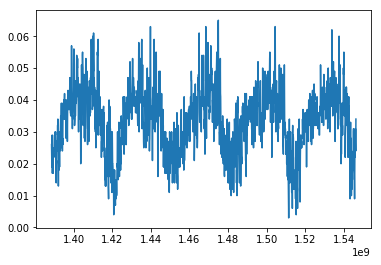

In [30]:
plt.plot(ozone_ts_series)

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    

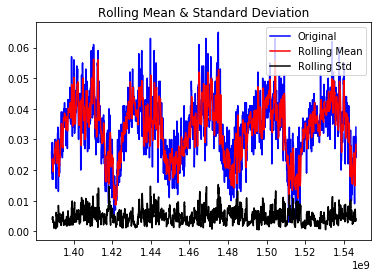

Results of Dickey-Fuller Test:
Test Statistic                   -4.111852
p-value                           0.000926
#Lags Used                       13.000000
Number of Observations Used    1812.000000
Critical Value (1%)              -3.433964
Critical Value (5%)              -2.863136
Critical Value (10%)             -2.567620
dtype: float64


In [40]:
test_stationarity(ozone_ts_series)

Since test statistic is greater than the critical values, then we fail to reject the null hypothesis. This means we can not say that this time series is stationary.

### Estimating and eliminating trend:

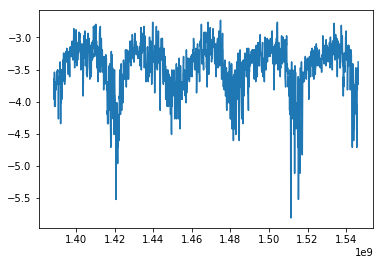

In [42]:
ozone_ts_log = np.log(ozone_ts_series)
plt.plot(ozone_ts_log)

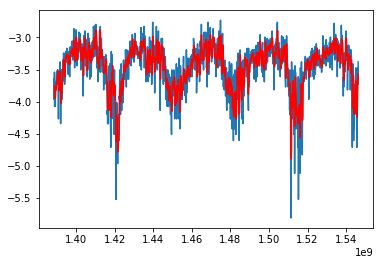

In [43]:
ozone_moving_avg = ozone_ts_log.rolling(5).mean()
plt.plot(ozone_ts_log)
plt.plot(ozone_moving_avg, color='red')

In [45]:
ozone_ts_log_moving_avg_diff = ozone_ts_log - ozone_moving_avg
ozone_ts_log_moving_avg_diff.head(5)

Date
1388534400         NaN
1388620800         NaN
1388707200         NaN
1388793600         NaN
1388880000    0.217326
dtype: float64

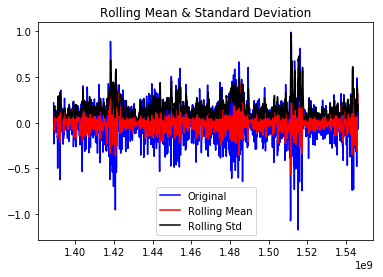

Results of Dickey-Fuller Test:
Test Statistic                  -19.049845
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    1811.000000
Critical Value (1%)              -3.433966
Critical Value (5%)              -2.863137
Critical Value (10%)             -2.567620
dtype: float64


In [46]:
ozone_ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ozone_ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series.

## Autoregression - Ozone

In [47]:
from statsmodels.tsa.ar_model import AR
from random import random
# fit model
model = AR(ozone_ts_series)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(ozone_ts_series), len(ozone_ts_series))
print(yhat)

1826    0.031377
dtype: float64


/Users/Ksenia/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Ksenia/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## Time series analysis - CO

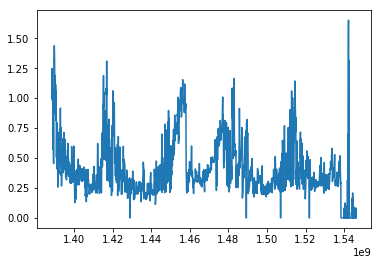

In [10]:
plt.plot(merged['Date'], merged['CO'])